In [ ]:
# |default_exp app

In [3]:
#|export
import torch, torchvision
import mmdet
from fastbook import *
from fastai.vision.widgets import *
from mmdet.core.visualization.image import my_output_for_gr
from mmdet.apis import inference_detector
import gradio as gr
model = pickle.load(open('simpcon_class_model.pkl', 'rb')).eval()


Для классификации изображений в файле mmdet.core.visualization.image я добавила код, который при условии что обнаруженный объект имеет класс "0" - человек
происходит кроп по баундинг боксу детектированного человека и вырезанная картинка отправляется на классификацию модели yoga_poses_classificator_model.pkl
модель натрннированная на датасете по классификации картинок для йоги (из Кагл) - основа модели Eficcitntnrt_b0

Функция визуализации show_result_pyplot из mmdetection печатает результат, но ничего не возвращает
по этому я ввела дополнительную функцию  my_output_for_gr() которая возвращает значение numpy.array
для визуализации использовала средства gradio на huggingface
https://huggingface.co/spaces/danilovabg/detection_project

In [4]:
#|export
from mmdet.core.visualization.image import my_output_for_gr

def app_result(img):
    result = inference_detector(model, img)
    model.show_result(img, result, score_thr=0.4, text_color=(200, 200, 200))
    out = my_output_for_gr()
    return out

проверим результат

not yoga person
sports ball


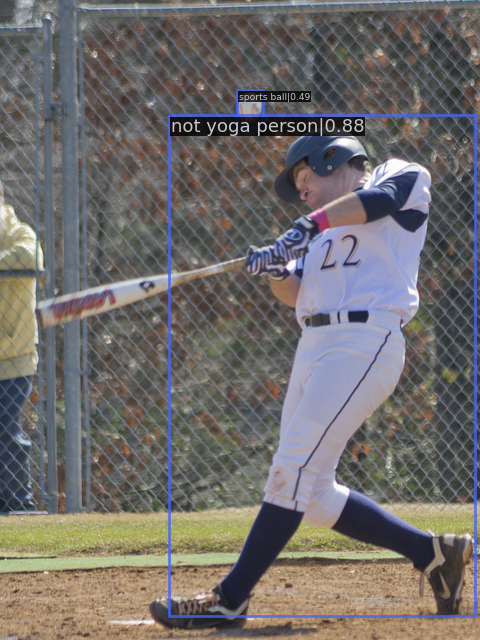

In [4]:
x = app_result('000000000016.jpg')
Image.fromarray(x[:,:,::-1], 'RGB')

In [5]:
#|export

in_image =  gr.components.Image()
out_image = gr.components.Image()
examples = ['000000000016.jpg', 'test2.jpg', 'yoga1.jpg', 'yoga2.jpg', 'yoga3.jpg']
intf = gr.Interface(fn = app_result, inputs = in_image, outputs = in_image, examples = examples)
intf.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f0ebbbb5-51d5-4feb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


yoga person
pose is salabhasana
not yoga person
sports ball


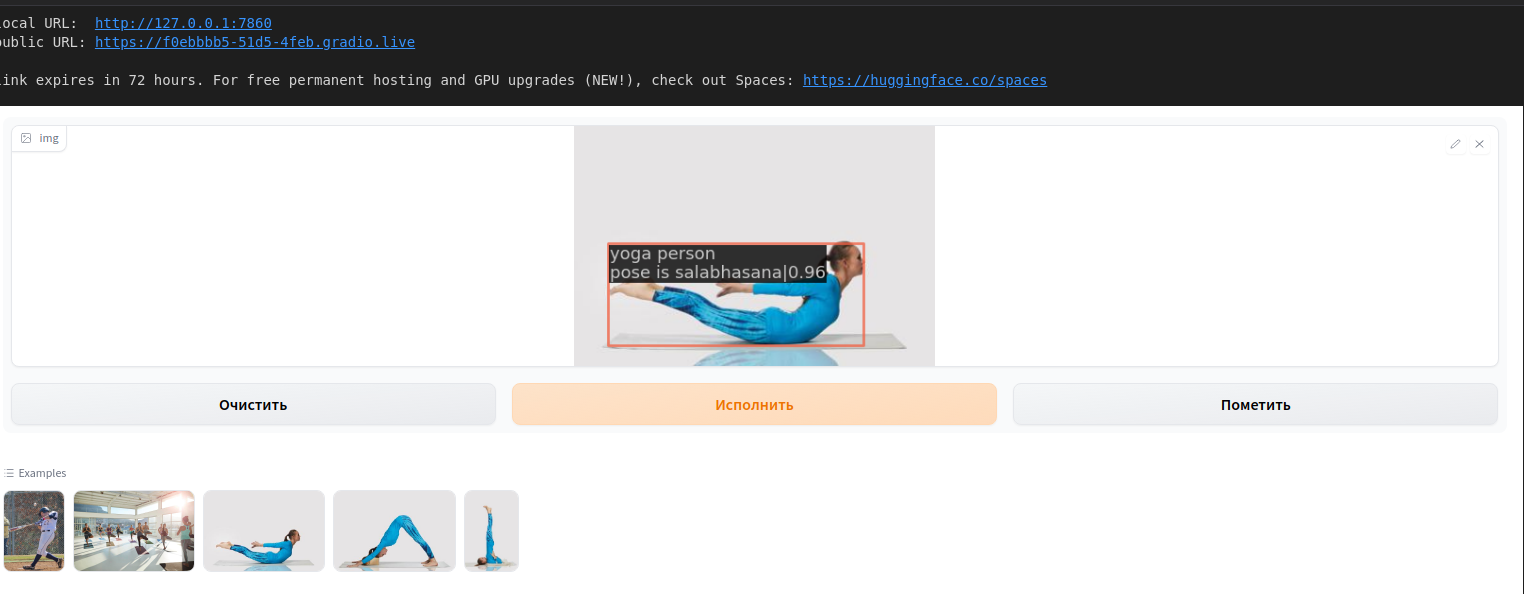

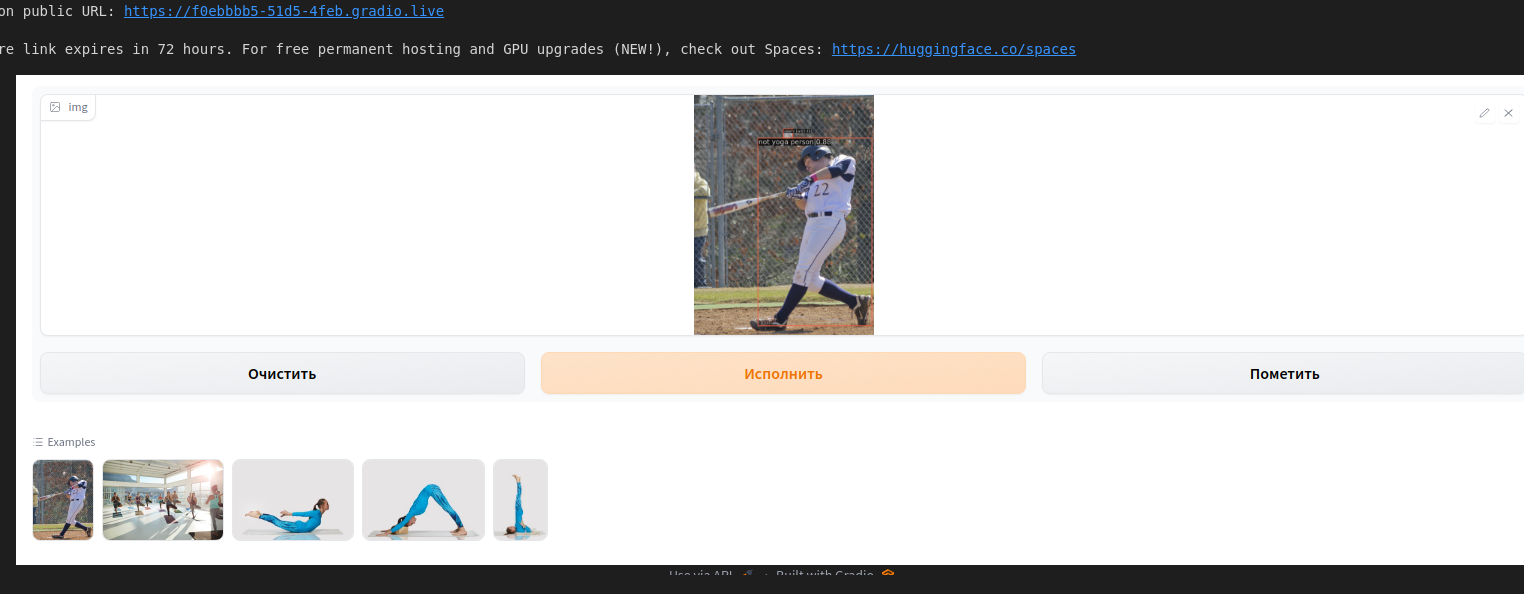

In [14]:
import nbdev
nbdev.export.nb_export('mmdet_model.ipynb')
print('Export successful')

Export successful
